# Venus Atmospheric Modelling
The Open University<br>
Module SXS841 Masters level project in physical sciences<br>
***
End of Module Assignment (EMA) 01<br>
Stuart Gavin Smith<br>
H1872126<br>
01 January 2025<br>
Version:1.0<br>
***

Import libraries of supporting code; pandas and numpy are used for creating datasets and plotting. 

In [1]:
import calendar
import datetime
import sys
import warnings
warnings.simplefilter('ignore', FutureWarning)
from pandas import *
from numpy import  *
%matplotlib inline

In [2]:
#Download the CSV data files as needed from the data collection
LAS_LOW_ATM ='https://atmos.nmsu.edu/PDS/data/PDS4/pv_sed_bundle/data_atm_struct/descent_low_atm/las_low_atm_state.csv'
SAS_DAY_LOW_ATM ='https://atmos.nmsu.edu/PDS/data/PDS4/pv_sed_bundle/data_atm_struct/descent_low_atm/sas_day_low_atm_state.csv'
SAS_NIGHT_LOW_ATM ='https://atmos.nmsu.edu/PDS/data/PDS4/pv_sed_bundle/data_atm_struct/descent_low_atm/sas_night_low_atm_state.csv'
SAS_NORTH_LOW_ATM ='https://atmos.nmsu.edu/PDS/data/PDS4/pv_sed_bundle/data_atm_struct/descent_low_atm/sas_north_low_atm_state.csv'
SAS_NIGHT_HIGH_ATM ='https://atmos.nmsu.edu/PDS/data/PDS4/pv_sed_bundle/data_atm_struct/entry_high_atm/sas_night_high_atm_state.csv'
SAS_DAY_MID_ATM ='https://atmos.nmsu.edu/PDS/data/PDS4/pv_sed_bundle/data_atm_struct/entry_mid_atm/sas_day_mid_atm_state.csv'
SAS_NIGHT_MID_ATM ='https://atmos.nmsu.edu/PDS/data/PDS4/pv_sed_bundle/data_atm_struct/entry_mid_atm/sas_night_mid_atm_state.csv'
SAS_NORTH_MID_ATM ='https://atmos.nmsu.edu/PDS/data/PDS4/pv_sed_bundle/data_atm_struct/entry_mid_atm/sas_north_mid_atm_state.csv'
SNFR_DAY_NET_FLUX = 'https://atmos.nmsu.edu/PDS/data/PDS4/pv_sed_bundle/data_snfr/snfr_day_net_flux.csv'
LSFR_SOLAR_FLUX = 'https://atmos.nmsu.edu/PDS/data/PDS4/pv_sed_bundle/data_lsfr/lsfr_solar_flux.csv'
LGC_LOW_ATM_COMP = 'https://atmos.nmsu.edu/PDS/data/PDS4/pv_sed_bundle/data_lgc/lgc_low_atm_comp.csv'

#Read CSV data into dataframe, on error, print warning and stop kernel.
try:
    dfA=read_csv(LAS_LOW_ATM, header=None,names=['GRT-HR-MIN', 'GRT-SEC','ALT-KM','P-BARS','T-DEG-K','RHO-KG-M3','ZETA'])
except:
    print("LAS_LOW_ATM Venus data does not exist, or some other error")
    Error = True
    exit()
    
#Add this data into the plotting data frame
dfALT_T = dfA[['ALT-KM', 'T-DEG-K']]
dfALT_P = dfA[['ALT-KM', 'P-BARS']]
dfALT_D = dfA[['ALT-KM', 'RHO-KG-M3']]

#Read CSV data into dataframe, on error, print warning and stop kernel.
try:
    dfB=read_csv(SAS_DAY_LOW_ATM, header=None,names=['GRT-HR-MIN', 'GRT-SEC','ALT-KM','P-BARS','T-DEG-K','RHO-KG-M3','ZETA'])
except:
    print("SAS_DAY_LOW_ATM Venus data does not exist, or some other error")
    Error = True
    exit()
    
#Add this data into the plotting data frame
dfALT_T = concat([dfB[['ALT-KM', 'T-DEG-K']], dfALT_T])
dfALT_P = concat([dfB[['ALT-KM', 'P-BARS']], dfALT_P])
dfALT_D = concat([dfB[['ALT-KM', 'RHO-KG-M3']], dfALT_D])
    
#Read CSV data into dataframe, on error, print warning and stop kernel.
try:
    dfC=read_csv(SAS_NIGHT_LOW_ATM, header=None,names=['GRT-HR-MIN', 'GRT-SEC','ALT-KM','P-BARS','T-DEG-K','RHO-KG-M3','ZETA'])
except:
    print("SAS_NIGHT_LOW_ATM Venus data does not exist, or some other error")
    Error = True
    exit()
    
#Add this data into the plotting data frame
dfALT_T = concat([dfC[['ALT-KM', 'T-DEG-K']], dfALT_T])
dfALT_P = concat([dfC[['ALT-KM', 'P-BARS']], dfALT_P])
dfALT_D = concat([dfC[['ALT-KM', 'RHO-KG-M3']], dfALT_D])

#Read CSV data into dataframe, on error, print warning and stop kernel.
try:
    dfD=read_csv(SAS_NORTH_LOW_ATM, header=None,names=['GRT-HR-MIN', 'GRT-SEC','ALT-KM','P-BARS','T-DEG-K','RHO-KG-M3','ZETA'])
except:
    print("SAS_NORTH_LOW_ATM Venus data does not exist, or some other error")
    Error = True
    exit()
    
#Add this data into the plotting data frame
dfALT_T = concat([dfD[['ALT-KM', 'T-DEG-K']], dfALT_T])
dfALT_P = concat([dfD[['ALT-KM', 'P-BARS']], dfALT_P])
dfALT_D = concat([dfD[['ALT-KM', 'RHO-KG-M3']], dfALT_D])

#Read CSV data into dataframe, on error, print warning and stop kernel.
try:
    dfE=read_csv(SAS_NIGHT_HIGH_ATM, header=None,names=(['ALT-KM','RHO-KG-M3','P-MB','T-DEG-K']))
except:
    print("SAS_NIGHT_HIGH_ATM Venus data does not exist, or some other error")
    Error = True
    exit()
    
#Add this data into the plotting data frame
dfALT_T = concat([dfE[['ALT-KM', 'T-DEG-K']], dfALT_T])
#convert MB to Bars
dfE['P-BARS'] = dfE['P-MB'] / 1000
dfALT_P = concat([dfE[['ALT-KM', 'P-BARS']], dfALT_P])
dfALT_D = concat([dfE[['ALT-KM', 'RHO-KG-M3']], dfALT_D])

#Read CSV data into dataframe, on error, print warning and stop kernel.
try:
    dfF=read_csv(SAS_DAY_MID_ATM, header=None,names=(['GRT-HR-MIN', 'GRT-SEC','ALT-KM','V-KMS', 'GAM-DEG','RHO-KG-M3','P-MB','T-DEG-K','COMMENT']))
except:
    print("SAS_DAY_MID_ATM Venus data does not exist, or some other error")
    Error = True
    exit()

#Add this data into the plotting data frame
dfALT_T = concat([dfF[['ALT-KM', 'T-DEG-K']], dfALT_T])
#convert MB to Bars
dfF['P-BARS'] = dfF['P-MB'] / 1000
dfALT_P = concat([dfF[['ALT-KM', 'P-BARS']], dfALT_P])
dfALT_D = concat([dfF[['ALT-KM', 'RHO-KG-M3']], dfALT_D])


#Read CSV data into dataframe, on error, print warning and stop kernel.
try:
    dfG=read_csv(SAS_NIGHT_MID_ATM, header=None,names=(['GRT-HR-MIN', 'GRT-SEC','ALT-KM','V-KMS', 'GAM-DEG','RHO-KG-M3','P-MB','T-DEG-K','COMMENT']))
except:
    print("SAS_NIGHT_MID_ATM Venus data does not exist, or some other error")
    Error = True
    exit()

#Add this data into the plotting data frame
dfALT_T = concat([dfG[['ALT-KM', 'T-DEG-K']], dfALT_T])
#convert MB to Bars
dfG['P-BARS'] = dfG['P-MB'] / 1000
dfALT_P = concat([dfG[['ALT-KM', 'P-BARS']], dfALT_P])
dfALT_D = concat([dfG[['ALT-KM', 'RHO-KG-M3']], dfALT_D])

#Read CSV data into dataframe, on error, print warning and stop kernel.
try:
    dfH=read_csv(SAS_NORTH_MID_ATM, header=None,names=(['GRT-HR-MIN', 'GRT-SEC','ALT-KM','V-KMS', 'GAM-DEG','RHO-KG-M3','P-MB','T-DEG-K','COMMENT']))
except:
    print("SAS_NORTH_MID_ATM Venus data does not exist, or some other error")
    Error = True
    exit()
    
#Add this data into the plotting data frame
dfALT_T = concat([dfH[['ALT-KM', 'T-DEG-K']], dfALT_T])
#convert MB to Bars
dfH['P-BARS'] = dfH['P-MB'] / 1000
dfALT_P = concat([dfH[['ALT-KM', 'P-BARS']], dfALT_P])
dfALT_D = concat([dfH[['ALT-KM', 'RHO-KG-M3']], dfALT_D])


#Read CSV data into dataframe, on error, print warning and stop kernel.
try:
    dfI=read_csv(SNFR_DAY_NET_FLUX, header=None,names=['GRT-19H-MIN', 'ALT-KM', 'P-BAR','TATM-K','SENSORT','FNET-W-M2','FCORR'])
except:
    print("SNFR_DAY_NET_FLUX Venus data does not exist, or some other error")
    Error = True
    exit()
    
#Add this data into the plotting data frame
dfALT_F = dfI[['ALT-KM', 'FCORR']]

#Read CSV data into dataframe, on error, print warning and stop kernel.
try:
    dfJ=read_csv(LSFR_SOLAR_FLUX, header=None,names=['GRT-HR-MIN','P-BAR','ALT-KM','VIS-D','VIS-U','VIS-N','COM-D','COM-U','COM-N','NB-D','NB-U','NB-N'])
except:
    print("LSFR_SOLAR_FLUX Venus data does not exist, or some other error")
    Error = True
    exit()
    
#Add this data into the plotting data frame
dfALT_S = dfJ[['ALT-KM', 'COM-U']]


#Read CSV data into dataframe, on error, print warning and stop kernel.
try:
    dfK=read_csv(LGC_LOW_ATM_COMP, header=None,names=['Sample','GRT-HM','ALT-KM','P-BARS','P1','P2','P3','P4','CO2-PC','CO2-1','CO2-2','CO2-3','CO2-4','N2-PC','N2-1','N2-2','N2-3','N2-4','H2O-PC','H2O-1','H2O-2','H2O-3','H2O-4','O2-PPM','O2-1','O2-2','O2-3','O2-4','AR-PPM','AR-1','AR-2','AR-3','AR-4','CO-PPM','CO-1','CO-2','CO-3','CO-4','NE-PPM','NE-1','NE-2','NE-3','NE-4','SO2-PPM','SO2-1','SO2-2','SO2-3','SO2-4','H2','METHANE','KRYPTON','ETHELYNE','ETHANE','HYDROGEN-SULFIDE','CARBONYL-SULFIDE','PROPANE','NITROUS-OXIDE'])
except:
    print("LGC_LOW_ATM_COMP Venus data does not exist, or some other error")
    Error = True
    exit()
    
#Add this data into the plotting data frame
dfALT_COMP_PC = dfK[['ALT-KM', 'CO2-PC','N2-PC','H2O-PC']]
dfALT_COMP_PPM = dfK[['ALT-KM', 'CO2-PC','N2-PC','H2O-PC']]


Plot the integrated atmospheric data

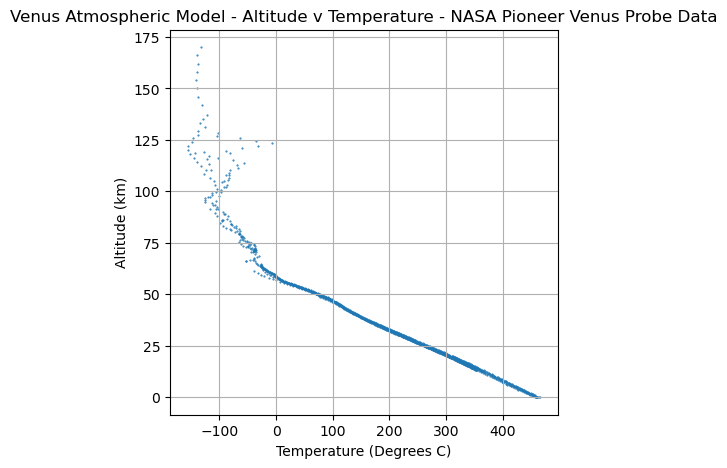

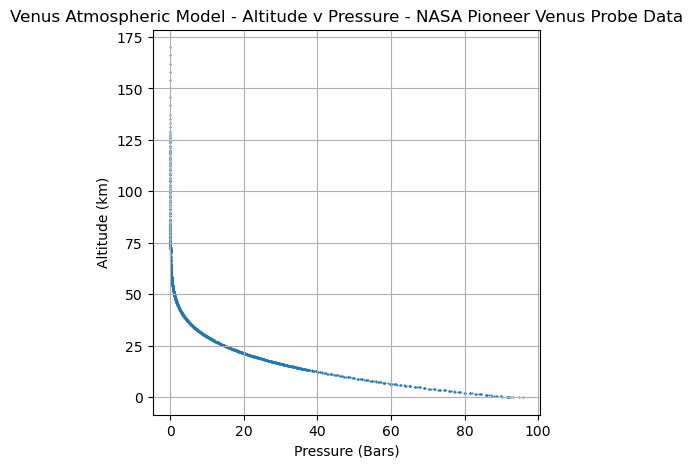

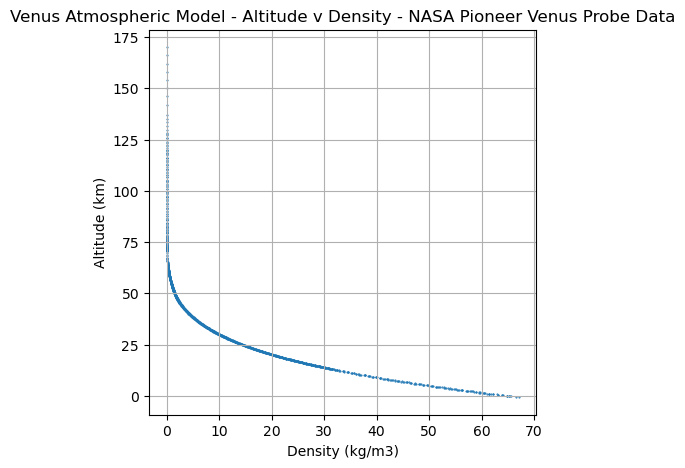

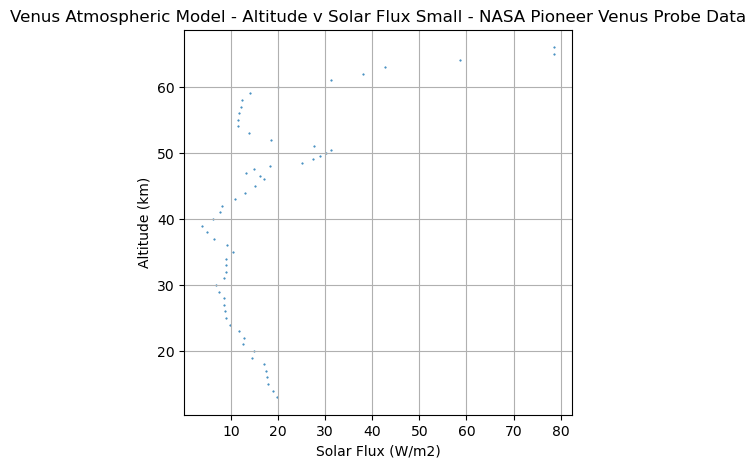

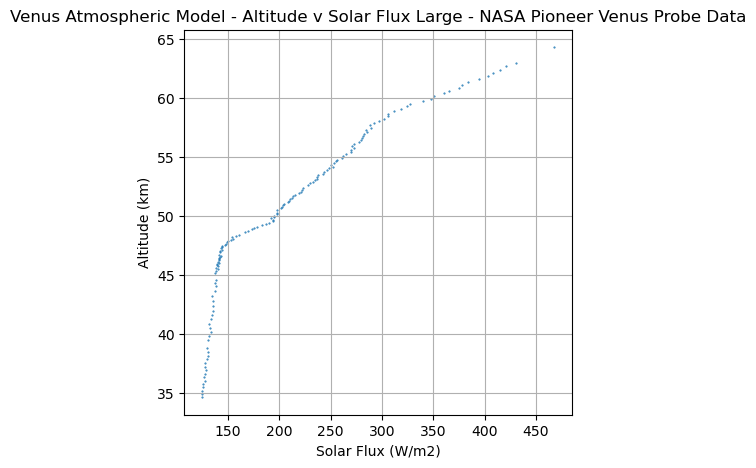

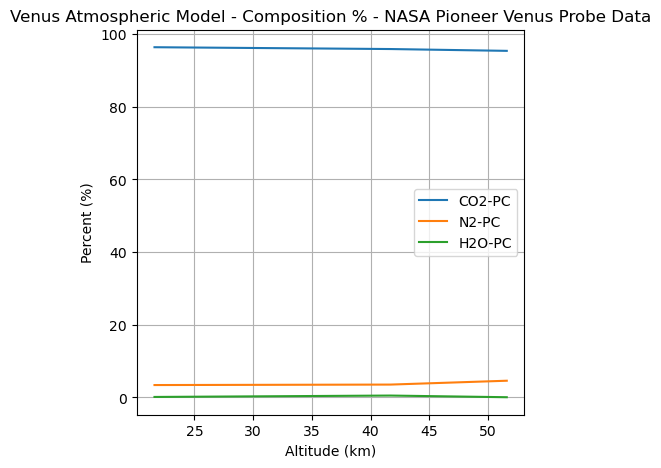

In [4]:
#Set the Graph Title
GraphTitle = 'Venus Atmospheric Model - Altitude v Temperature - NASA Pioneer Venus Probe Data'

#Convert K to Degrees Celsius 
dfALT_T['T-DEG-C'] = dfALT_T['T-DEG-K']-273.15

#Remove negative altitudes 
condition  = (dfALT_T['ALT-KM'] < 0.0 )
dfALT_T.loc[condition, 'ALT-KM'] = 0

#Sort by altitude descending
dfALT_T.sort_values("ALT-KM", ascending=False)

#Plot Data Frame
dfALT_T.plot(x='T-DEG-C', y='ALT-KM', s=0.25, grid=True, figsize=(5,5), kind='scatter',title=GraphTitle, xlabel="Temperature (Degrees C)", ylabel="Altitude (km)" )


#Set the Graph Title
GraphTitle = 'Venus Atmospheric Model - Altitude v Pressure - NASA Pioneer Venus Probe Data'

#Remove negative altitudes 
condition  = (dfALT_P['ALT-KM'] < 0.0 )
dfALT_P.loc[condition, 'ALT-KM'] = 0

#Sort by altitude descending
dfALT_P.sort_values("ALT-KM", ascending=False)

#Plot Data Frame
dfALT_P.plot(x='P-BARS', y='ALT-KM', s=0.25,  grid=True, figsize=(5,5), kind='scatter',title=GraphTitle, xlabel="Pressure (Bars)", ylabel="Altitude (km)" )


#Set the Graph Title
GraphTitle = 'Venus Atmospheric Model - Altitude v Density - NASA Pioneer Venus Probe Data'

#Remove negative altitudes 
condition  = (dfALT_P['ALT-KM'] < 0.0 )
dfALT_D.loc[condition, 'ALT-KM'] = 0

#Sort by altitude descending
dfALT_D.sort_values("ALT-KM", ascending=False)

#Plot Data Frame
dfALT_D.plot(x='RHO-KG-M3', y='ALT-KM', s=0.25,  grid=True, figsize=(5,5), kind='scatter',title=GraphTitle, xlabel="Density (kg/m3)", ylabel="Altitude (km)" )


#Set the Graph Title
GraphTitle = 'Venus Atmospheric Model - Altitude v Solar Flux Small - NASA Pioneer Venus Probe Data'

#Sort by altitude descending
dfALT_F.sort_values("ALT-KM", ascending=False)

#Plot Data Frame
dfALT_F.plot(x='FCORR', y='ALT-KM', s=0.25,  grid=True, figsize=(5,5), kind='scatter',title=GraphTitle, xlabel="Solar Flux (W/m2)", ylabel="Altitude (km)" )


#Set the Graph Title
GraphTitle = 'Venus Atmospheric Model - Altitude v Solar Flux Large - NASA Pioneer Venus Probe Data'

#Sort by altitude descending
dfALT_S.sort_values("ALT-KM", ascending=False)

#Plot Data Frame
dfALT_S.plot(x='COM-U', y='ALT-KM', s=0.25,  grid=True, figsize=(5,5), kind='scatter',title=GraphTitle, xlabel="Solar Flux (W/m2)", ylabel="Altitude (km)" )


#Set the Graph Title
GraphTitle = 'Venus Atmospheric Model - Composition % - NASA Pioneer Venus Probe Data'

#Sort by altitude descending
dfALT_COMP_PC.sort_values("ALT-KM", ascending=False)

#Plot Data Frame
dfALT_COMP_PC.plot(x='ALT-KM', y=['CO2-PC','N2-PC','H2O-PC'], grid=True, figsize=(5,5), kind='line',title=GraphTitle, xlabel="Altitude (km)", ylabel="Percent (%)" )


dfALT_COMP_PC

#Store Data Frames
dfALT_P.to_csv(r'C:\Users\stuar\OneDrive\Open University\SXS841\Venus Atmospheric Modelling\CSV_Exports\dfALT_P.csv', encoding='utf-8', index=False)
dfALT_T.to_csv(r'C:\Users\stuar\OneDrive\Open University\SXS841\Venus Atmospheric Modelling\CSV_Exports\dfALT_T.csv', encoding='utf-8', index=False)
dfALT_D.to_csv(r'C:\Users\stuar\OneDrive\Open University\SXS841\Venus Atmospheric Modelling\CSV_Exports\dfALT_D.csv', encoding='utf-8', index=False)
dfALT_F.to_csv(r'C:\Users\stuar\OneDrive\Open University\SXS841\Venus Atmospheric Modelling\CSV_Exports\dfALT_F.csv', encoding='utf-8', index=False)
dfALT_S.to_csv(r'C:\Users\stuar\OneDrive\Open University\SXS841\Venus Atmospheric Modelling\CSV_Exports\dfALT_S.csv', encoding='utf-8', index=False)
dfALT_COMP_PC.to_csv(r'C:\Users\stuar\OneDrive\Open University\SXS841\Venus Atmospheric Modelling\CSV_Exports\dfALT_COMP_PC.csv', encoding='utf-8', index=False)
dfALT_COMP_PPM.to_csv(r'C:\Users\stuar\OneDrive\Open University\SXS841\Venus Atmospheric Modelling\CSV_Exports\dfALT_COMP_PPM.csv', encoding='utf-8', index=False)